In [113]:
from pathlib import Path
import pandas as pd

# Read the photos table
photos = pd.read_csv(os.path.join(Path('unsplash-dataset/full'), "photos.tsv000"), sep='\t', header=0)

# Print some stats
print(f'Photos in the dataset: {photos.shape[0]}')

Photos in the dataset: 1981321


In [114]:
import numpy as np

photo_vectors = np.load('unsplash-dataset/clip/features.npy')
keys_data = pd.read_csv('unsplash-dataset/clip/keys.csv')
photo_keys = list(keys_data['photo_id'])

print(len(photo_keys))
print(photo_vectors.shape)

1981161
(1981161, 512)


In [136]:
description = "Two dogs playing in the snow"

In [137]:
import clip
import torch

# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

with torch.no_grad():
    # Encode and normalize the description using CLIP
    description_encoded = model.encode_text(clip.tokenize(description).to(device))
    description_encoded /= description_encoded.norm(dim=-1, keepdim=True)

In [138]:
# Retrieve the description vector and the photo vectors
description_vector = description_encoded.cpu().numpy()

# Compute the similarity between the descrption and each photo using the Cosine similarity
similarities = list((description_vector @ photo_vectors.T).squeeze(0))

# Sort the photos by their similarity score
best_photos = sorted(zip(similarities, range(len(photos))), key=lambda x: x[0], reverse=True)

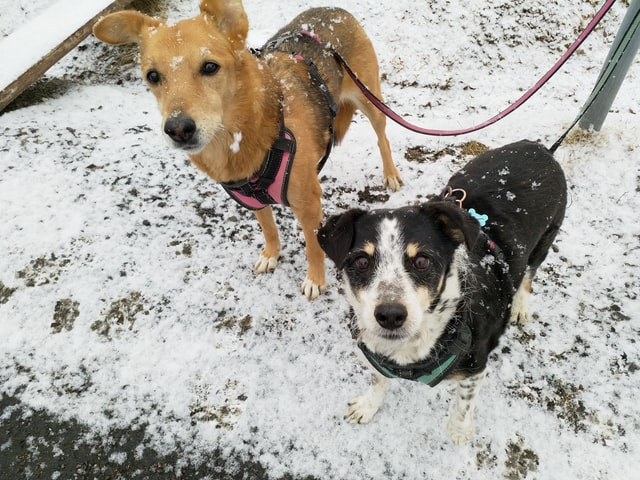

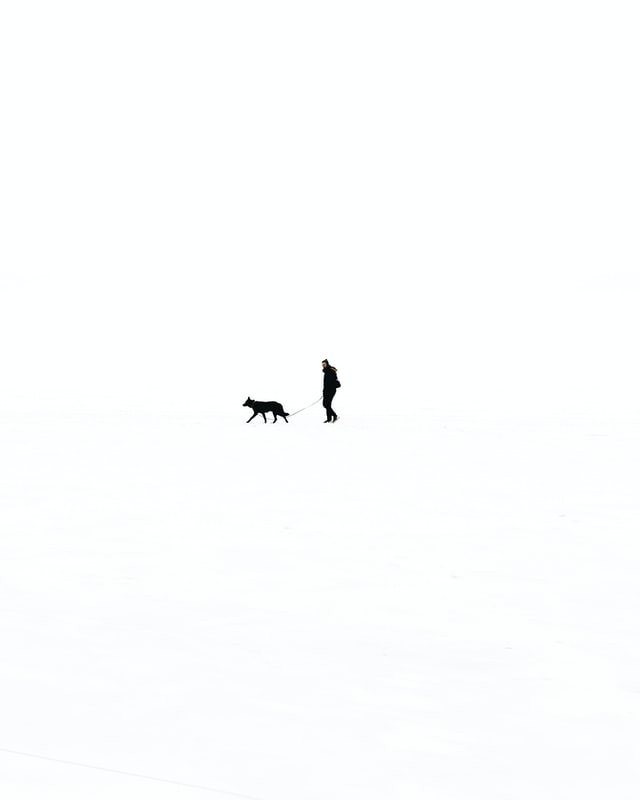

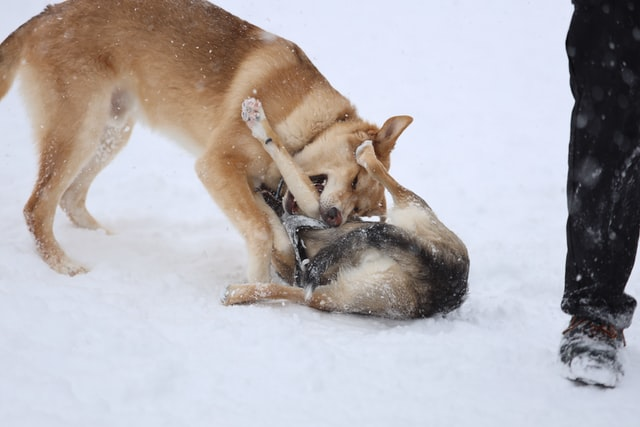

In [139]:
from IPython.display import Image
from shutil import copyfile

for i in range(3):
    idx = best_photos[i][1]
    photo_id = photo_keys[idx]

    display(Image(filename=f'unsplash-dataset/photos/{photo_id}.jpg'))
    copyfile(f'unsplash-dataset/photos/{photo_id}.jpg', f'tmp/{photo_id}.jpg')
    